In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.normalization import BatchNormalization

In [90]:
train = np.loadtxt('train.csv', delimiter=',', dtype=np.float32)
x_test = np.loadtxt('test.csv', delimiter=',', dtype=np.float32)

In [91]:
x_train = train[:, 1:785]
y_train = train[:, 0]

x_train = x_train.reshape( 42000, 28, 28, 1)
x_train = x_train/255
x_test = x_test.reshape(28000, 28, 28, 1)
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train)

In [131]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), kernel_initializer='he_normal',
                        activation='relu', input_shape=(28,28,1,)))
#model.add(BatchNormalization())

model.add(layers.Conv2D(128, (3,3), kernel_initializer='he_normal', activation='relu'))
#model.add(BatchNormalization())

model.add(layers.Conv2D(256, (5,5), kernel_initializer='he_normal', activation='relu'))
#model.add(BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
#model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adam(lr=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=300, epochs=20)

Epoch 1/20
42000/42000 [==============================] - 13s 310us/step - loss: 0.3243 - acc: 0.9130
Epoch 2/20
42000/42000 [==============================] - 9s 223us/step - loss: 0.0725 - acc: 0.9779
Epoch 3/20
42000/42000 [==============================] - 9s 223us/step - loss: 0.0544 - acc: 0.9831
Epoch 4/20
42000/42000 [==============================] - 9s 225us/step - loss: 0.0440 - acc: 0.9858
Epoch 5/20
42000/42000 [==============================] - 9s 223us/step - loss: 0.0370 - acc: 0.9882
Epoch 6/20
42000/42000 [==============================] - 9s 223us/step - loss: 0.0329 - acc: 0.9897
Epoch 7/20
42000/42000 [==============================] - 9s 225us/step - loss: 0.0271 - acc: 0.9914
Epoch 8/20
42000/42000 [==============================] - 9s 224us/step - loss: 0.0237 - acc: 0.9925
Epoch 9/20
42000/42000 [==============================] - 9s 225us/step - loss: 0.0240 - acc: 0.9920
Epoch 10/20
42000/42000 [==============================] - 9s 224us/step - loss: 0.0208 - 

In [127]:
(x,y), (x_t, y_t) = keras.datasets.mnist.load_data()
x_t = x_t.reshape(10000,28,28,1)
y_t = keras.utils.to_categorical(y_t)
score = model.evaluate(x_t, y_t)
print(score)

10000/10000 [==============================] - 2s 206us/step
[2.1353612089780394, 0.8665]


In [128]:
y_test = model.predict(x_test)
y_test = np.argmax(y_test, axis=1)
Id = np.arange(1, x_test.shape[0]+1)

In [129]:
dataframe = pd.DataFrame({'ImageId':Id, 'Label':y_test})
dataframe.to_csv("submission.csv", index=False)

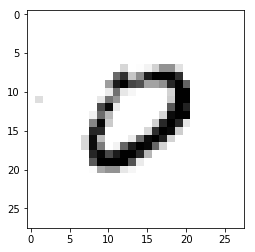

9


In [130]:
digit = x_test[3]
digit = digit.reshape((28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(y_test[3])

In [119]:
print(x_test.shape)
print(y_test.shape)

(28000, 28, 28, 1)
(28000,)
